In [326]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate

# 1. Ball In a Bowl

We solve the following differential equation:
$ m\ddot{\vec{r}} = -\xi\dot{\vec{r}}-\nabla U(\vec{r}) + \vec{F}_\mathrm{ext}.$

where :

$ \ddot{\vec{r}}$ : An acceleration vector.

$\xi\dot{\vec{r}}$ : A damping term.

$\nabla U(\vec{r})$ : A force as a gradiant of potential energy.

$\vec{F}_\mathrm{ext}$ : An external force. 



For the profile of the bowl we consider a quadratic function
$ U(\vec{r}) = U_0 r^2 = U_0 (x^2 + y^2). $

The gradient is 
$ \nabla U(\vec{r}) = 2U_0 \begin{pmatrix}x\\y\end{pmatrix} = 2U_0\vec{r}. $

## Visualizing The Bowl

Text(0.5, 0.92, 'Bowl')

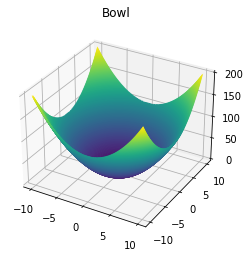

In [327]:
maxCoord=10
pointsNum=201
x, y = np.meshgrid(np.linspace(-maxCoord,maxCoord,pointsNum),np.linspace(-maxCoord,maxCoord,pointsNum))
z = x**2 + y**2

plotproj = plt.axes(projection='3d')
plotproj.contour3D(x,y,z,pointsNum)
plotproj.set_title('Bowl')

This system represents two uncoupled harmonic oscillators, and when we solved a harmonic oscillator problem(recall the pendulum motion) we needed two equations, so now that we are solving 2 of them, we need four equations.

### Defining Plotting Functions

In [329]:
def plotXandY(xLabel,yLabel,labelingPlotX,labelingPlotY,solArray):
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.plot(solArray.t,solArray.y[0],'red',label=labelingPlotX)
    plt.plot(solArray.t,solArray.y[1],'blue',label=labelingPlotY)
    plt.legend()

In [330]:
def ballBowl(bowlRadius,solArray):
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.set_aspect(1)
    timeArray=np.linspace(0,2*np.pi,100)
    xBowl=bowlRadius*np.cos(timeArray)
    yBowl=bowlRadius*np.sin(timeArray)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(xBowl,yBowl,color='blue',label='Bowl')
    plt.plot(solArray.y[0],solArray.y[1],color='red',label='ball trajectory')
    plt.legend()

### Solving

In [1]:
#first we will define the function that we will use with scipy.

m=1 #mass 
U0=1
xi=0.1 #damping factor
def f(t,initialValues):
    #x: intialValues[0]
    #y: initalValues[1]
    #velocity in X axis= initialValues[2]
    #velocity in y axis= initialValues[3]
    accX=(-xi/m)*initialValues[2] -(2*U0/m)*initialValues[0] 
    accY=(-xi/m)*initialValues[3] -(2*U0/m)*initialValues[1]
    # it's assumed that the external force =0
    return [initialValues[2],initialValues[3],accX,accY]
    

* Linear trajectory

In [331]:
t0=0
tFinal=100
nMax=1001  #number of points

#starting initial values, where vX0=0 and vY0=0
x0=0.5
y0=1
vX0=0
vY0=0
time=np.linspace(t0,tFinal,nMax)

ballLinear=integrate.solve_ivp(f,[t0,tFinal],[x0,y0,vX0,vY0],method='RK45',t_eval=time)

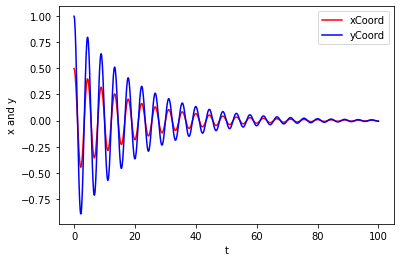

In [332]:
plotXandY('t','x and y','xCoord','yCoord',ballLinear)

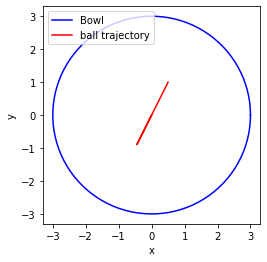

In [333]:
ballBowl(3,ballLinear)
#The output makes sense, as long as the ball's starting position wasn't at 
# the minimal energy position(the middle), and vX0 and vY0=0 
#therefore, the ball will move in a linear trajectory back and forth.

* Elliptical trajectory

In [334]:
t0=0
tFinal=100
nMax=1001  #number of points

#starting initial values, where at least one of the starting velocities isn't 0
x0=2
y0=0
vX0=0
vY0=1

ballEliptical=integrate.solve_ivp(f,[t0,tFinal],[x0,y0,vX0,vY0],method='RK45',t_eval=time)

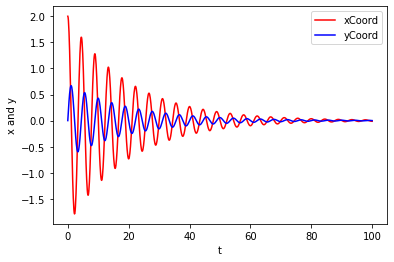

In [335]:

plotXandY('t','x and y','xCoord','yCoord',ballEliptical)

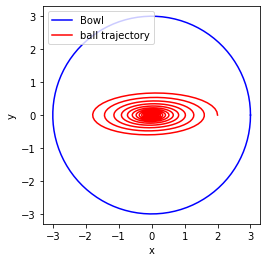

In [336]:
ballBowl(3,ballEliptical)

* External force applied

In [337]:
A=4 #amplitude
timeOfOsc=50 #time of oscellation
phi=np.pi / 4
def f(t,initialValues):
    #x: intialValues[0]
    #y: initalValues[1]
    #velocity in X axis= initialValues[2]
    #velocity in y axis= initialValues[3]
    fx=A*np.sin(2*np.pi*t/timeOfOsc)*np.cos(phi) #force in x direction
    fy=A*np.sin(2*np.pi*t/timeOfOsc)*np.sin(phi) #force in y direction
    accX=(-xi/m)*initialValues[2] -(2*U0/m)*initialValues[0]+ fx/m
    accY=(-xi/m)*initialValues[3] -(2*U0/m)*initialValues[1]+ fy/m
    # it's assumed that the exit force =0
    return [initialValues[2],initialValues[3],accX,accY]

In [344]:

t0=0
tFinal=100
x0=0
y0=2
vX0=1
vY0=0
ballForce=integrate.solve_ivp(f,[t0,tFinal],[x0,y0,vX0,vY0],method='RK45',t_eval=time)

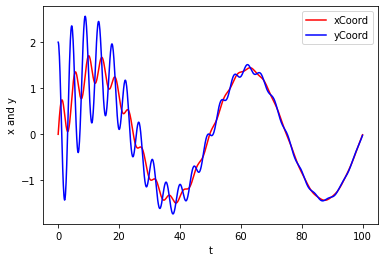

In [345]:
plotXandY('t','x and y','xCoord','yCoord',ballForce)

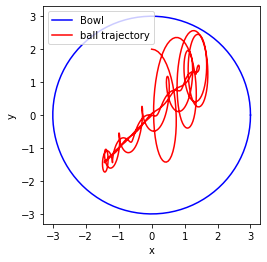

In [346]:
ballBowl(3,ballForce)
#you may think that we did something wrong, however that's the true output xd
#in the beginning, it starts to move elliptically, but due to the periodically changing force,
#in the end, it will move(for the most part) on a linear trajectory back and forth